## This is to detect potholes on the road by a runtime camera:

Using yolo v8 to explore the private training and objectification of singular classes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pwd

/content


In [2]:
import os
import glob
from IPython.display import Image, display
from IPython import display

In [3]:
display.clear_output()

In [4]:
!nvidia-smi

Sat Aug  5 19:26:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
HOME = os.getcwd()

In [6]:
print(HOME)

/content


In [7]:
!pwd

/content


## YOLO v8:

It can be done in 2 ways, we can either clone the github repoo or we can simply consider ultralytics.

In this notebook, i will be using ultralytics.

In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 7.7 MB/s eta 0:00:00


In [9]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


## Importing potholes data:

Taking in the annotated poholes data from roboflow, using self api key made on this account.

In [10]:
!mkdir {HOME}/datasets

In [11]:
%cd {HOME}/datasets

/content/datasets


In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="M5LA0yhsPIrsjisFPZgt")
project = rf.workspace("kartik-zvust").project("pothole-detection-yolo-v8")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=a2771d4c0db02939c3ecb9e4c4d17f1288b9b83aa4a43ae6ef23f3b34a4f1e49
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to pothole-detection-yolo-v8-1 in yolov5pytorch:: 100%|██████████| 2908/2908 [00:01<00:00, 2597.66it/s]


In [13]:
%cd {HOME}

/content


In [14]:
%cd {dataset.location}

/content/datasets/pothole-detection-yolo-v8-1


In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/pothole-detection-yolov8/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/pothole-detection-yolov8/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

In [19]:
!ls {HOME}//runs/detect/train4

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch4800.jpg
events.out.tfevents.1691264158.59326f75ce50.3234.0  train_batch4801.jpg
F1_curve.png					    train_batch4802.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


## Confusion matrix:

To ev aluate the true value as compared to true and false and same goes for the false part

/content


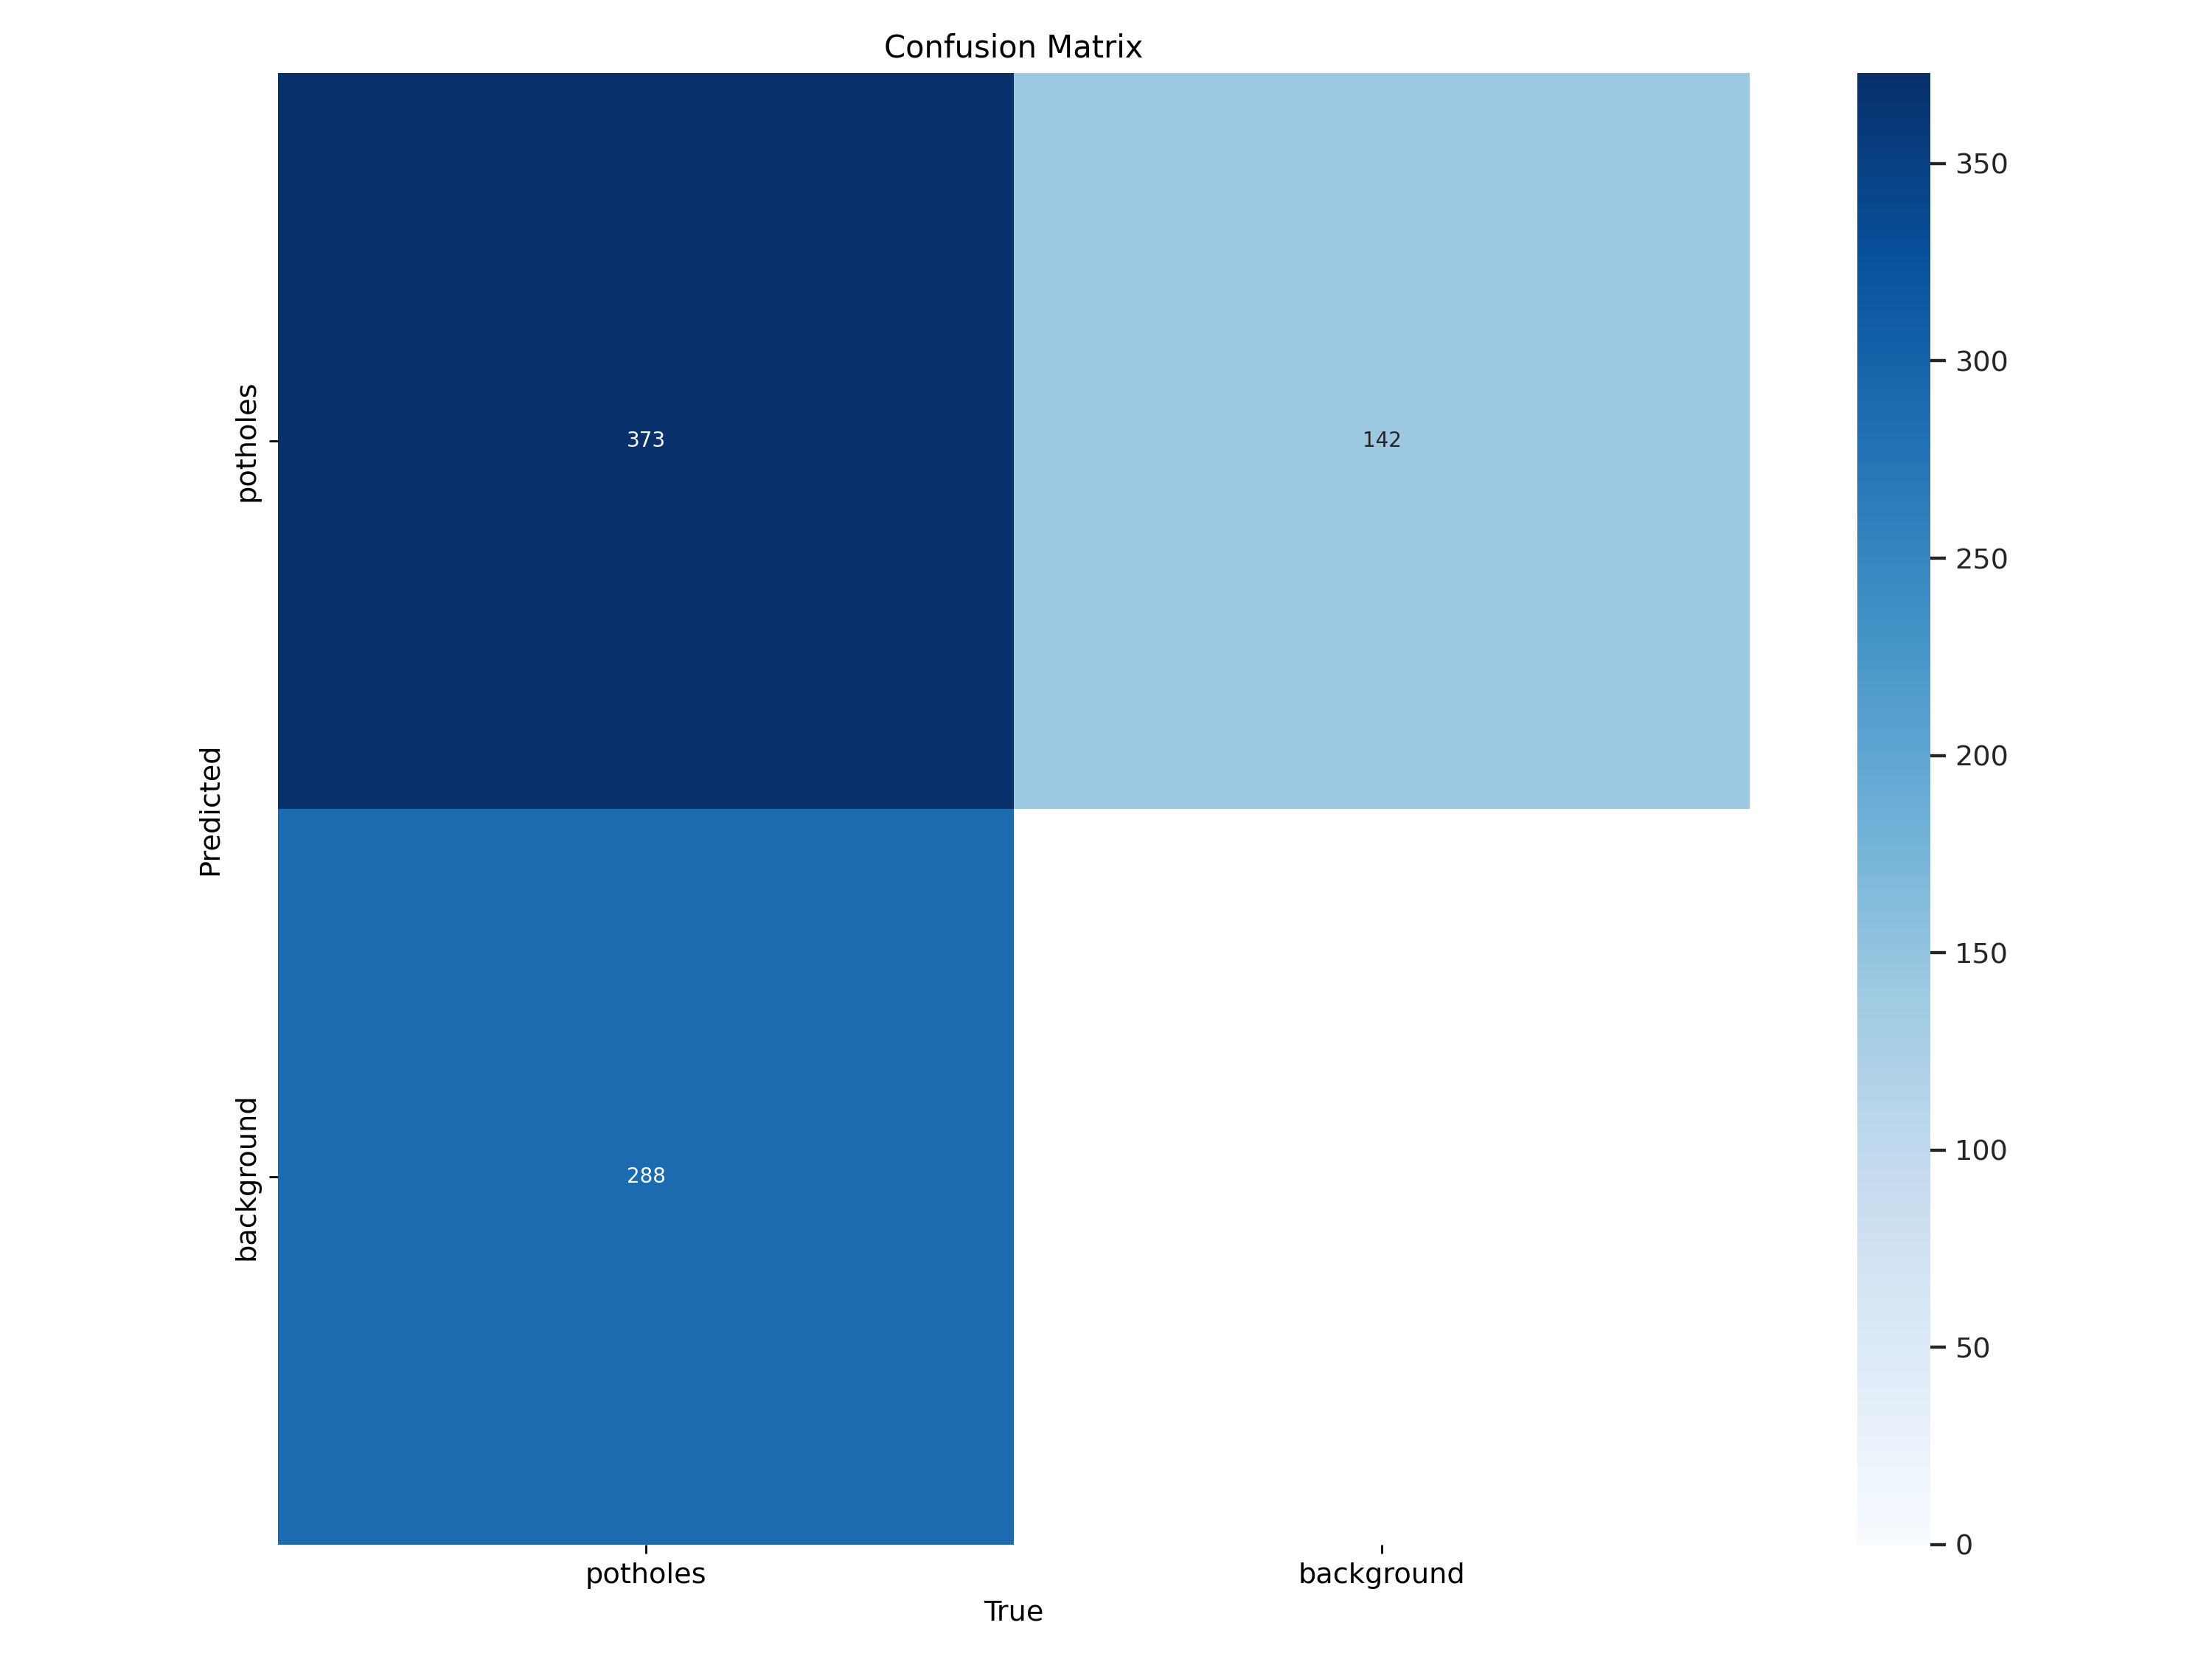

In [20]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=500)

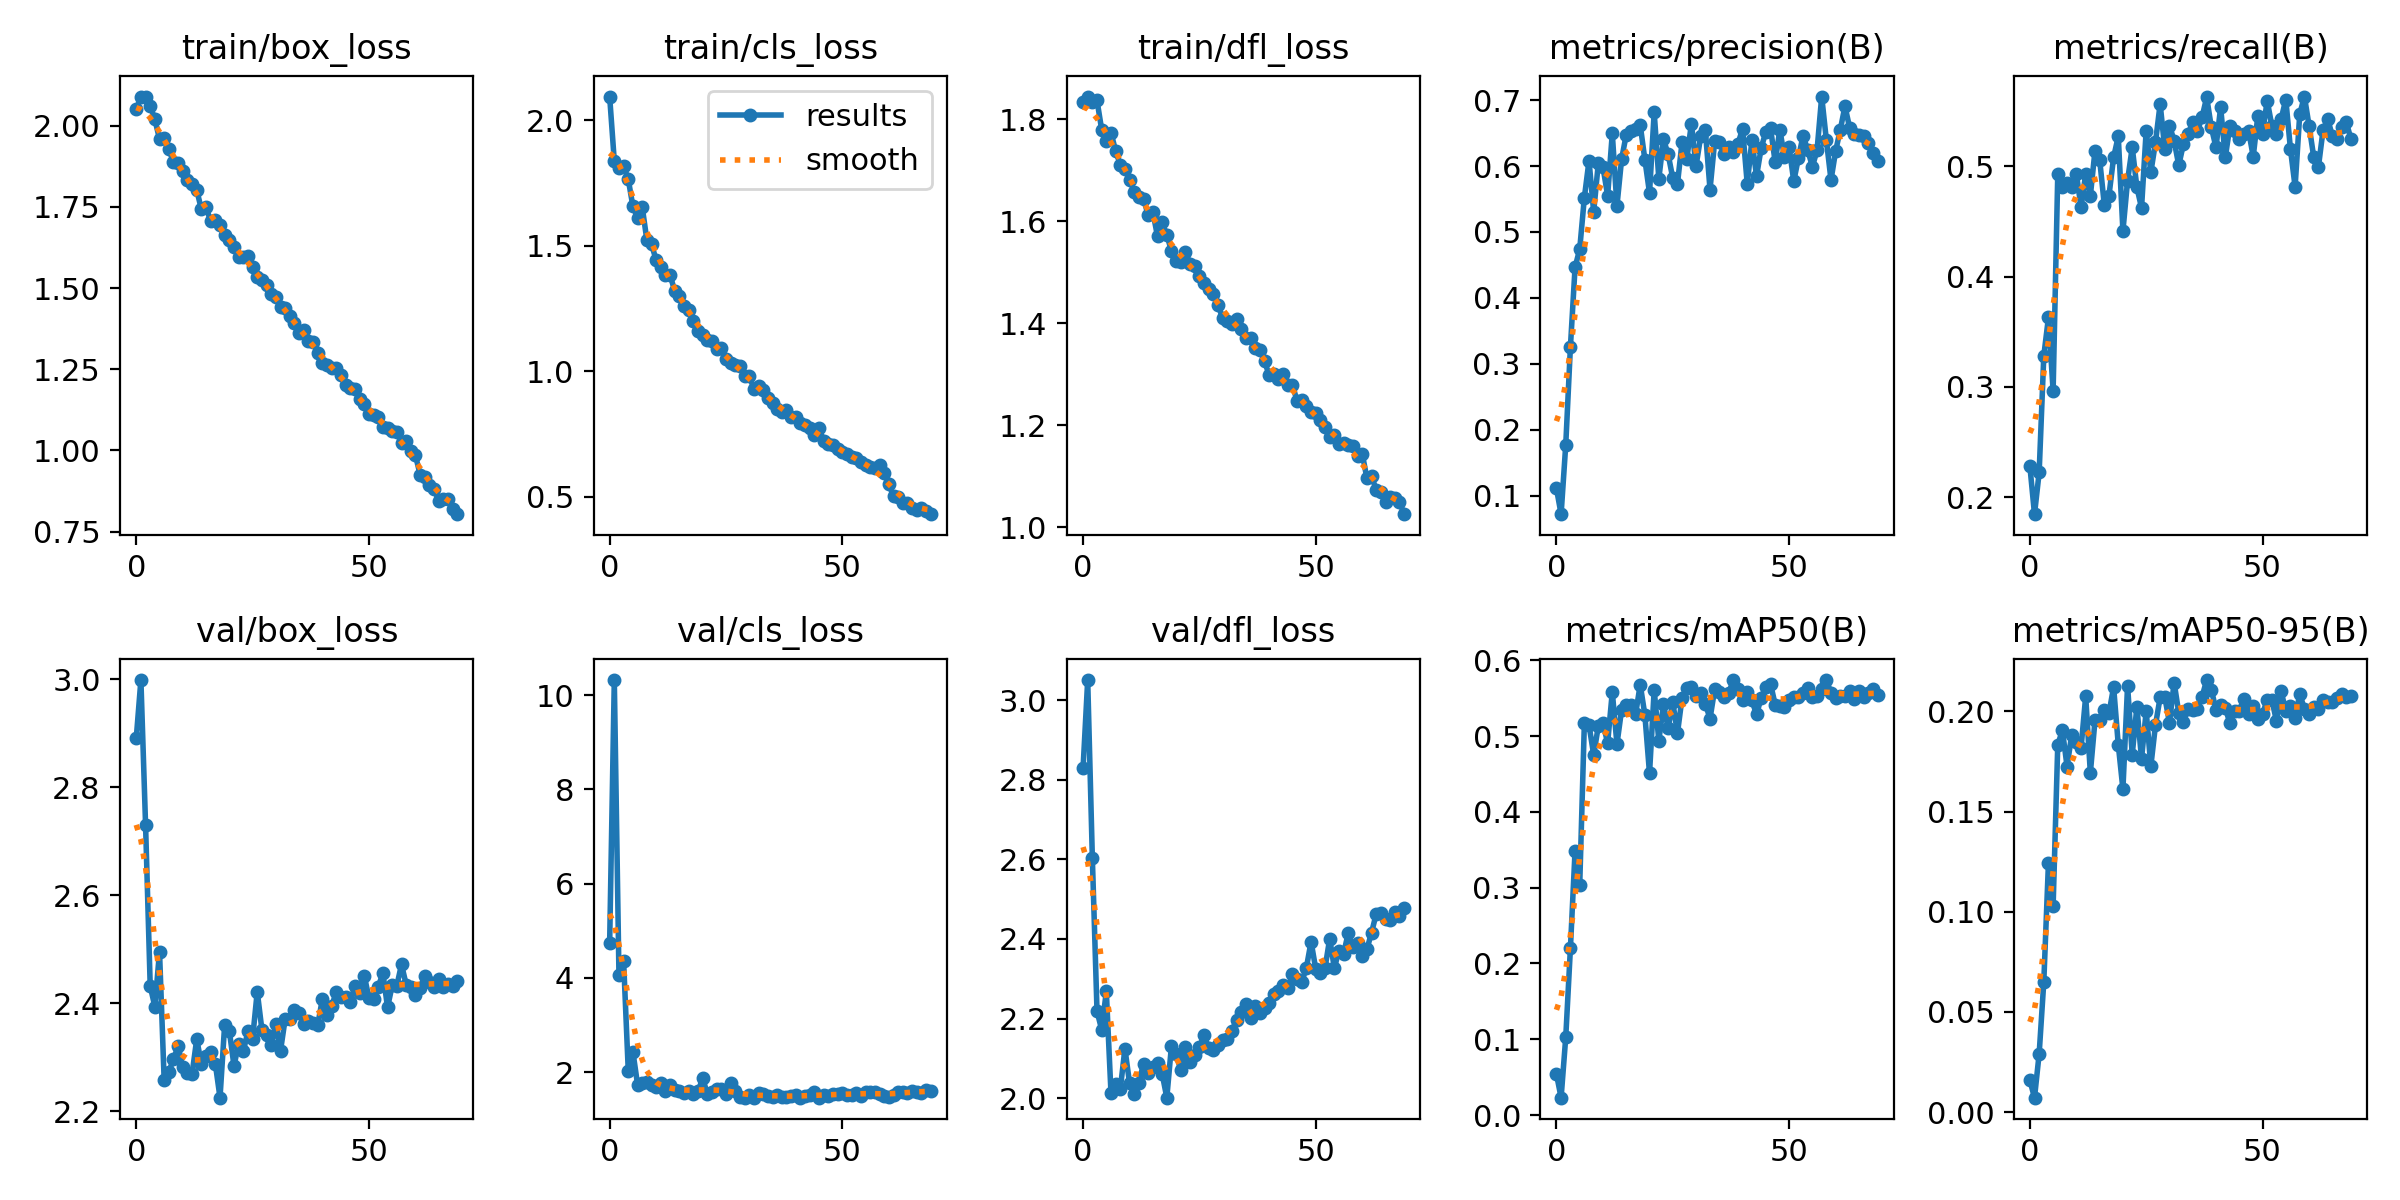

In [21]:
Image(filename=f'{HOME}/runs/detect/train4/results.png',width=600)

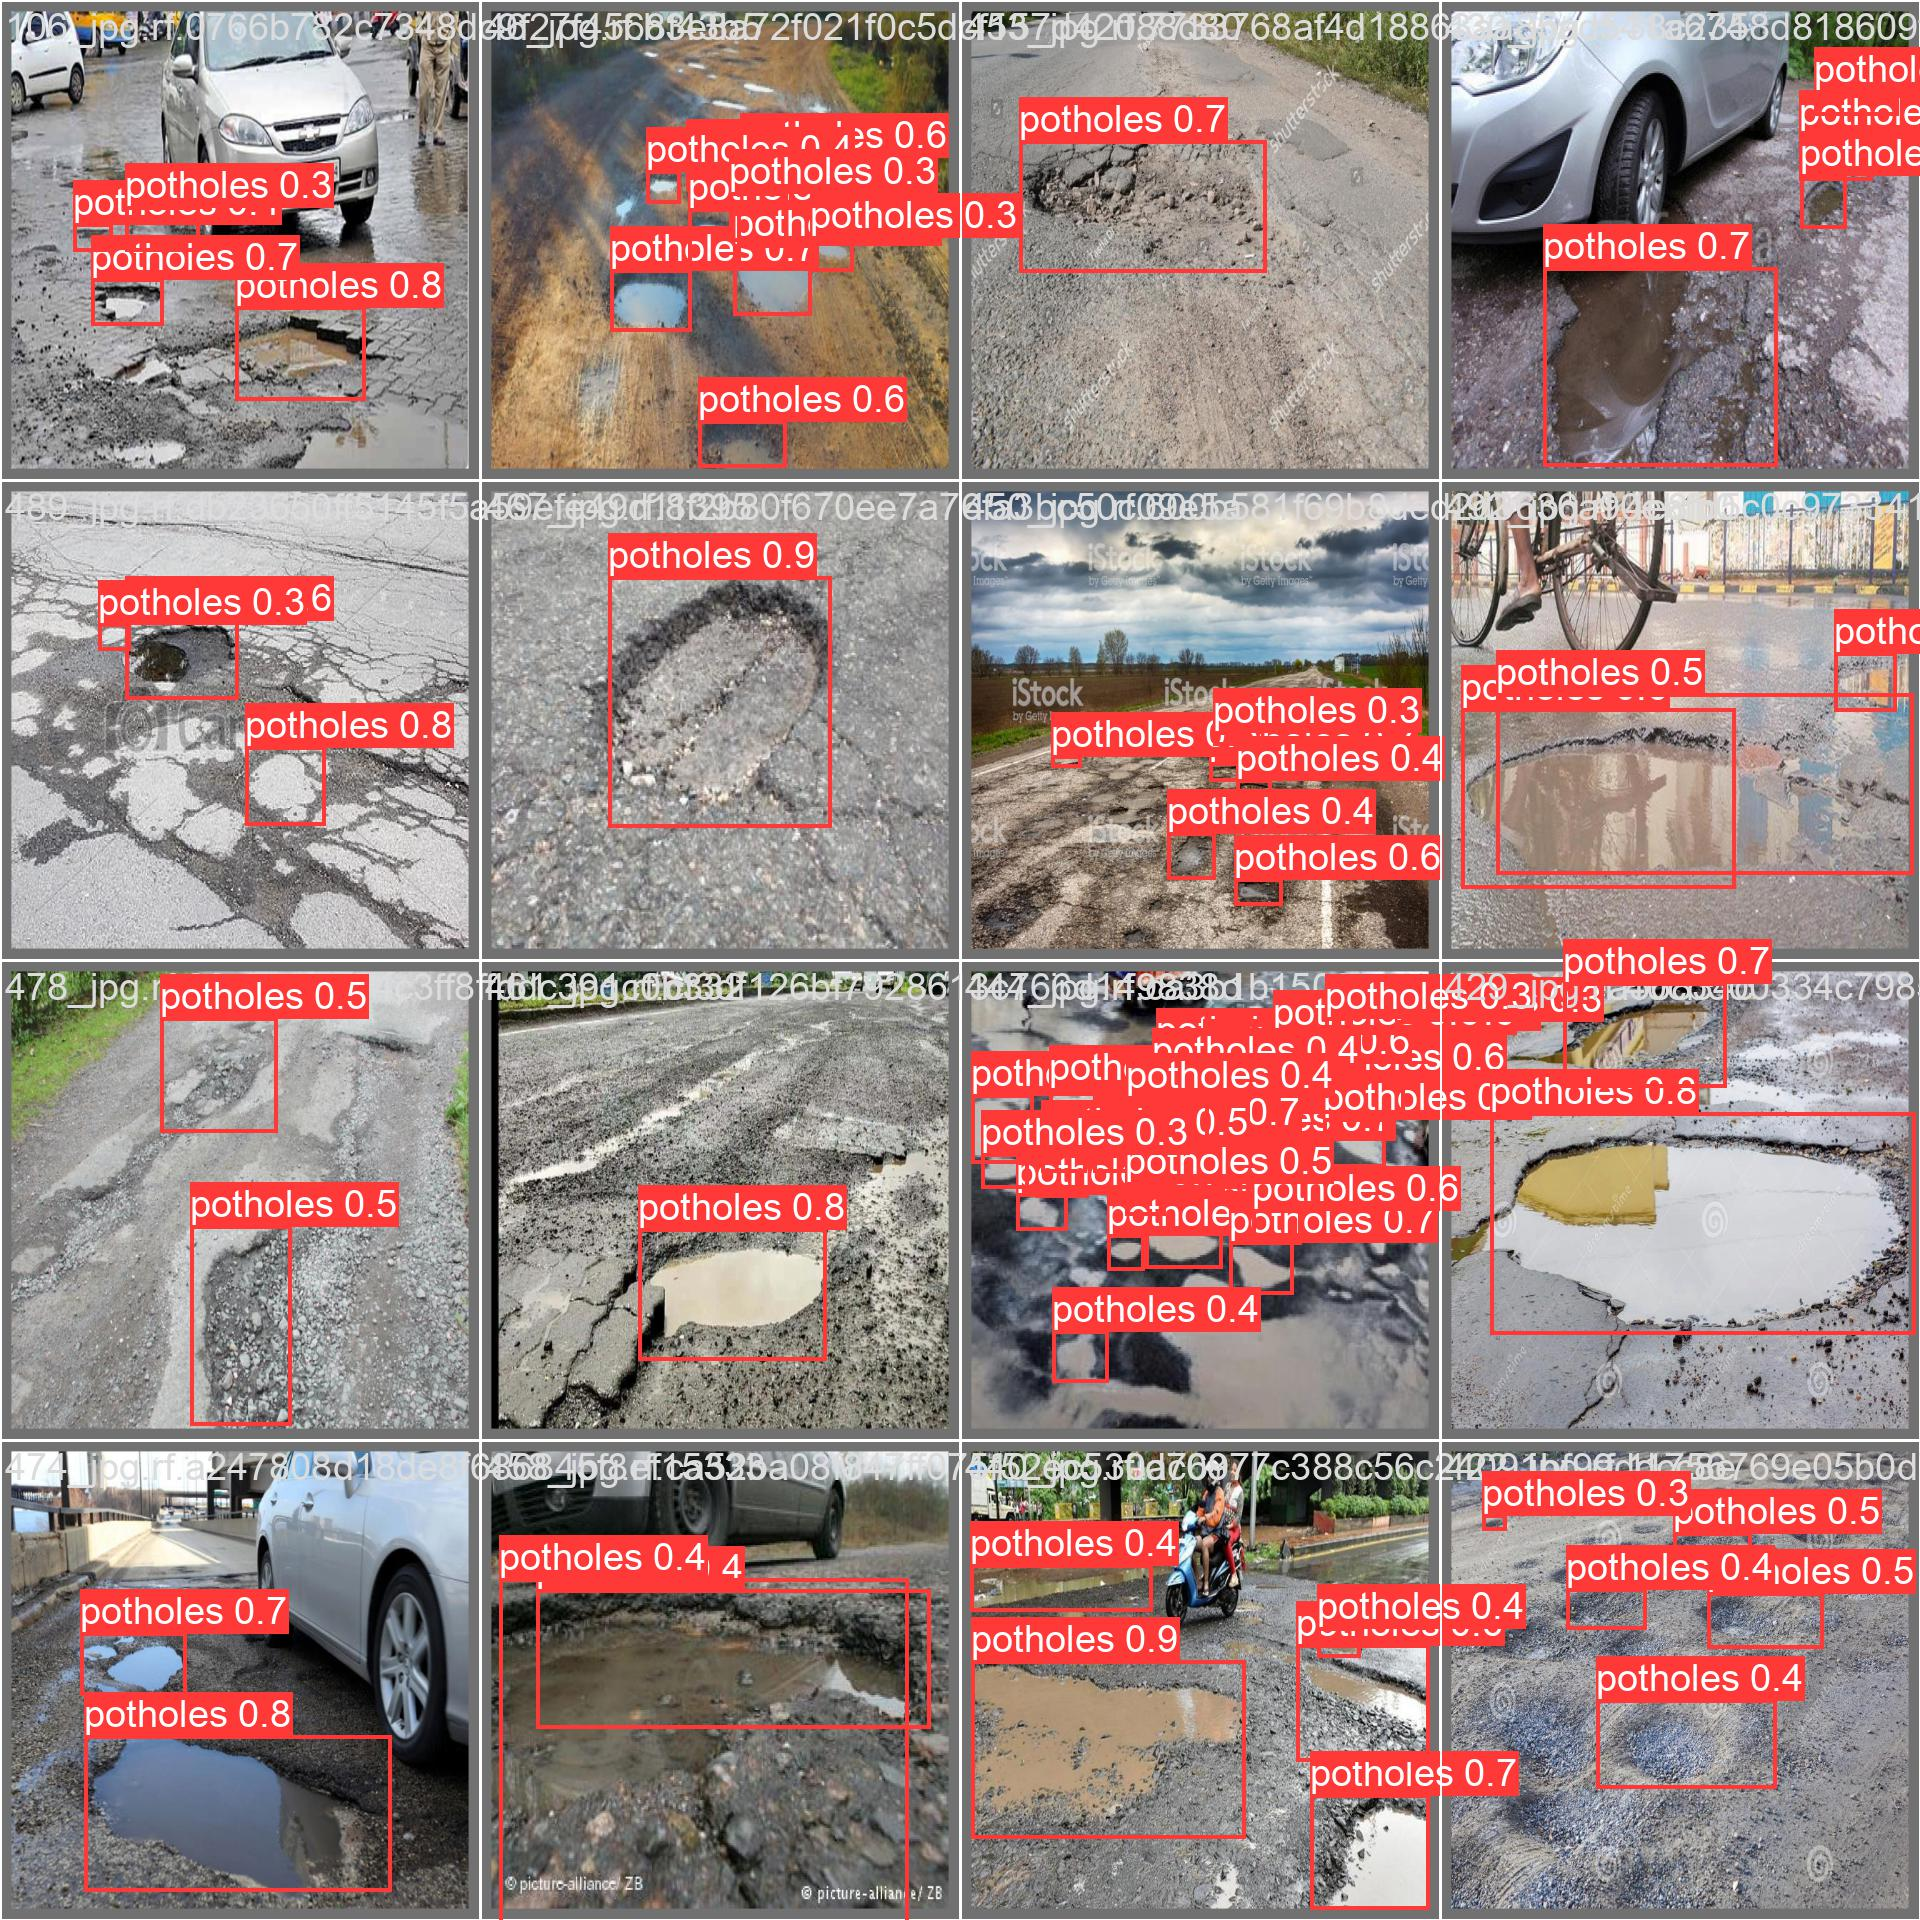

In [23]:
# to check for the images that were there on the validation dataset to give a self analysis of how the model performed and did it learn the paterns or was it a case of overfitting

Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg',width=600)

## Validate the custom model based on the best weights detected while training.

In [24]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data=/content/datasets/pothole-detection-yolov8/data.yaml

/content
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /content/datasets/pothole-detection-yolov8/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100% 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:08<00:00,  1.12s/it]
                   all        121        661       0.62      0.561      0.572      0.216
Speed: 3.0ms preprocess, 26.7ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to runs/detect/val


## Inference of the Custom model:

By using demo videos.

In [27]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 66.0MB/s]


In [30]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source="/content/demo.mp4"

/content
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

video 1/1 (1/324) /content/demo.mp4: 384x640 6 potholess, 102.7ms
video 1/1 (2/324) /content/demo.mp4: 384x640 7 potholess, 25.8ms
video 1/1 (3/324) /content/demo.mp4: 384x640 7 potholess, 25.8ms
video 1/1 (4/324) /content/demo.mp4: 384x640 6 potholess, 25.8ms
video 1/1 (5/324) /content/demo.mp4: 384x640 6 potholess, 25.8ms
video 1/1 (6/324) /content/demo.mp4: 384x640 5 potholess, 25.8ms
video 1/1 (7/324) /content/demo.mp4: 384x640 6 potholess, 25.8ms
video 1/1 (8/324) /content/demo.mp4: 384x640 8 potholess, 25.8ms
video 1/1 (9/324) /content/demo.mp4: 384x640 6 potholess, 19.1ms
video 1/1 (10/324) /content/demo.mp4: 384x640 6 potholess, 19.2ms
video 1/1 (11/324) /content/demo.mp4: 384x640 4 potholess, 19.1ms
video 1/1 (12/324) /content/demo.mp4: 384x640 6 potholess, 19.2ms
video 1/1 (13/324) /content/demo.mp4: 384x640 6 po

## Display the video:

In [47]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [50]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

FileNotFoundError: ignored